##    Coursera - IBM Data Science Capstone 
####  Segregation and Cluster Analysis of Toronto Neighbourhoods

## Part I 

#### Import required libraries

In [2]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup

####   Scrape Wiki Toronto Neighbourhood Table and Save to local csv.file

req = requests.get("https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M")
soup = BeautifulSoup(req.content,'lxml')
table = soup.find_all('table')[0]
df = pd.read_html(str(table))
df_m=pd.DataFrame(df[0])
df_m.to_csv(r'C:\Users\mlporter\atom\PY4E\toronto_hoods.txt')

#### Data Inspection and Pre-processing

##### Extract and inspect neighbourhood data frame and adjust column headers

In [3]:
csv_path=r"C:\Users\mlporter\atom\PY4E\toronto_hoods.txt"
df_m=pd.read_csv(csv_path)
df_m.rename(columns={'Postcode':'Postal Code', ' Borough':'Borough', ' Neighbourhood':'Neighbourhood'}, inplace=True)
df_m.head()

,Postal Code,Borough,Neighbourhood
0,M1A,Not assigned,xxxx
1,M2A,Not assigned,xxxx
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront


In [4]:
print(df_m.columns)

Index(['Postal Code', 'Borough', 'Neighbourhood'], dtype='object')


In [5]:
df_m.dtypes

Postal Code      object
Borough          object
Neighbourhood    object
dtype: object

#### Drop rows where Borough name is not assigned

In [6]:
dfnasgn = df_m[df_m['Borough'] == ' Not assigned'].index
df_m.drop(dfnasgn, inplace=True)
df_m.head()

,Postal Code,Borough,Neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
5,M6A,North York,Lawrence Heights
6,M6A,North York,Lawrence Manor


#### Use Borough name if Neighbourhood name is not assigned

In [7]:
df_m['Neighbourhood'] = np.where(df_m['Neighbourhood'] == 'Not assigned', df_m['Borough'], df_m['Neighbourhood'])

df_m.head()

,Postal Code,Borough,Neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
5,M6A,North York,Lawrence Heights
6,M6A,North York,Lawrence Manor


#### Group Neighborhoods with common Borough Names 

In [8]:
df_m2 = df_m.groupby(['Postal Code', 'Borough'],sort=False).agg(', '.join)
df_m2.reset_index(inplace=True)

df_m2.head()

,Postal Code,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,Harbourfront
3,M6A,North York,"Lawrence Heights, Lawrence Manor"
4,M7A,Downtown Toronto,Queen's Park


#### Inspect data frame shape

In [9]:
df_m2.shape

(103, 3)

## Part II

### Import Latitude and Longitude values Corresponding to Toronto Postal Codes

In [10]:
csv_path=r"C:\Users\mlporter\atom\PY4E\toronto_zips.txt"
df_zips=pd.read_csv(csv_path)

In [11]:
# csv_path=r"https://cocl.us/Geospatial_data"
# df_zips= pd.read_csv(csv_path,encoding='cp1252')
df_zips.rename(columns={' Latitude':'Latitude',' Longitude':'Longitude'}, inplace=True)
df_zips.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [12]:
print(df_zips.columns)

Index(['Postal Code', 'Latitude', 'Longitude'], dtype='object')


### Merge the Toronto Postal Code data with Toronto location data

In [13]:
df_hoods = pd.merge(df_m2, df_zips, on='Postal Code', how='outer')
df_hoods.head()              

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,Harbourfront,43.654260,-79.360636
3,M6A,North York,"Lawrence Heights, Lawrence Manor",43.718518,-79.464763
4,M7A,Downtown Toronto,Queen's Park,43.662301,-79.389494


### Inspect the total aggregated data

In [142]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 40)
df_hoods.head()

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,Harbourfront,43.654260,-79.360636
3,M6A,North York,"Lawrence Heights, Lawrence Manor",43.718518,-79.464763
4,M7A,Downtown Toronto,Queen's Park,43.662301,-79.389494


### Segregate Neighbourhoods with Toronto as part of Borough Name for Analysis Set

In [143]:
df_hoodsT = df_hoods[df_hoods['Borough'].str.contains('Toronto')]
df_hoodsT.reset_index(drop=True, inplace=True)

df_hoodsT.head()

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M5A,Downtown Toronto,Harbourfront,43.654260,-79.360636
1,M7A,Downtown Toronto,Queen's Park,43.662301,-79.389494
2,M5B,Downtown Toronto,"Ryerson, Garden District",43.657162,-79.378937
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
4,M4E,East Toronto,The Beaches,43.676357,-79.293031


### Describe Data Frame parameters

In [144]:
print('The dataframe has {} unique boroughs.'.format(len(df_hoodsT['Borough'].unique())))
      

The dataframe has 4 unique boroughs.


In [145]:
print('The dataframe has {} unique neighbourhoods.'.format(len(df_hoodsT['Neighbourhood'].unique())))

The dataframe has 39 unique neighbourhoods.


In [146]:
# Total data frame shape 
df_hoodsT.shape

(39, 5)

## Part III

### Import Required Libraries 

In [147]:
from geopy.geocoders import Nominatim

In [148]:
import folium

In [149]:
from IPython.display import Image
from IPython.core.display import HTML
from pandas.io.json import json_normalize
import random

In [150]:
import matplotlib.cm as cm
import matplotlib.colors as colors

In [151]:
from sklearn.cluster import KMeans

### Create map of Toronto and Selected Neighborhoods

In [152]:
map_toronto = folium.Map(location=[43.6532, -79.3832],zoom_start=12,width='100%', height='100%')


for lat, lng, borough, neighbourhood in zip(df_hoodsT['Latitude'], df_hoodsT['Longitude'], df_hoodsT['Borough'], df_hoodsT['Neighbourhood']):
    label = '{}, {}'.format(neighbourhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=True).add_to(map_toronto) 

#map_toronto.save('map_toronto.html')
map_toronto


### Extract Toronto Neighborhood data from Foursquare

#### Define Foursquare Credentials and Version

In [34]:
#url = https://foursquare.com/oauth2/authenticate?client_id=&response_type=code&redirect_uri=https://www.google.com
CLIENT_ID = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX'
CLIENT_SECRET = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX'
ACCESS_TOKEN = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX'
VERSION = '20180604'
LIMIT = 100
radius = 500

print('Client_ID: ',  CLIENT_ID)
print('Client_Secret: ',  CLIENT_SECRET)
print('Acces_Token: ',  ACCESS_TOKEN)

Client_ID:  99999999999999999999999999999999992N0H
Client_Secret: 000000000000000000000000000000AYMBRYPM0YYW4
Acces_Token:  88888888888888888888888888888888888AMSNH2LJPS3KUAWP


#### Get geographical coordinates of Toronto 

In [35]:
address = 'Toronto, ON'

geolocator = Nominatim(user_agent="can_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geographical coordinates of Toronto are {}, {}.'.format(latitude, longitude))

The geographical coordinates of Toronto are 43.653963, -79.387207.


#### Function to get the Top 100 venues for Toronto Neighbourhood data

In [36]:
def getNearbyVenues(names, latitudes, longitudes, radius=500, limit=100):
        
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude',
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### Examine extracted venues

In [37]:
toronto_venues = getNearbyVenues(names=df_hoodsT['Neighbourhood'],
                                   latitudes=df_hoodsT['Latitude'],
                                   longitudes=df_hoodsT['Longitude']
                                  )

 Harbourfront
 Queen's Park
 Ryerson,  Garden District
 St. James Town
 The Beaches
 Berczy Park
 Central Bay Street
 Christie
 Adelaide,  King,  Richmond
 Dovercourt Village,  Dufferin
 Harbourfront East,  Toronto Islands,  Union Station
 Little Portugal,  Trinity
 The Danforth West,  Riverdale
 Design Exchange,  Toronto Dominion Centre
 Brockton,  Exhibition Place,  Parkdale Village
 The Beaches West,  India Bazaar
 Commerce Court,  Victoria Hotel
 Studio District
 Lawrence Park
 Roselawn
 Davisville North
 Forest Hill North,  Forest Hill West
 High Park,  The Junction South
 North Toronto West
 The Annex,  North Midtown,  Yorkville
 Parkdale,  Roncesvalles
 Davisville
 Harbord,  University of Toronto
 Runnymede,  Swansea
 Moore Park,  Summerhill East
 Chinatown,  Grange Park,  Kensington Market
 Deer Park,  Forest Hill SE,  Rathnelly,  South Hill,  Summerhill West
 CN Tower,  Bathurst Quay,  Island airport,  Harbourfront West,  King and Spadina,  Railway Lands,  South Niagara
 Rosed

In [153]:
print(toronto_venues.shape)
toronto_venues.head()

(1712, 7)


,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Harbourfront,43.65426,-79.360636,Roselle Desserts,43.653447,-79.362017,Bakery
1,Harbourfront,43.65426,-79.360636,Tandem Coffee,43.653559,-79.361809,Coffee Shop
2,Harbourfront,43.65426,-79.360636,Cooper Koo Family YMCA,43.653249,-79.358008,Distribution Center
3,Harbourfront,43.65426,-79.360636,Body Blitz Spa East,43.654735,-79.359874,Spa
4,Harbourfront,43.65426,-79.360636,Impact Kitchen,43.656369,-79.356980,Restaurant


#### Group and count venues by neighbourhood

In [154]:
toronto_venues.groupby('Neighbourhood').count()

,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,
"Adelaide, King, Richmond",100,100,100,100,100,100
Berczy Park,55,55,55,55,55,55
"Brockton, Exhibition Place, Parkdale Village",22,22,22,22,22,22
Business Reply Mail Processing Centre 969 Eastern,15,15,15,15,15,15
"CN Tower, Bathurst Quay, Island airport, Harbourfront West, King and Spadina, Railway Lands, South Niagara",14,14,14,14,14,14
"Cabbagetown, St. James Town",43,43,43,43,43,43
Central Bay Street,81,81,81,81,81,81
"Chinatown, Grange Park, Kensington Market",89,89,89,89,89,89
Christie,17,17,17,17,17,17


In [155]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 239 uniques categories.


#### 3. Analyze the Toronto Boroughs Neighborhoods

##### Onehot encoding to represent categorical data

In [156]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighbourhood'] = toronto_venues['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Neighbourhood,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Business Service,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Cafeteria,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Costume Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hospital,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indoor Play Area,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Knitting Store,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Mac & Cheese Joint,Market,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Movie Theater,Museum,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Poke Place,Polish Restaurant,Pool,Poutine Place,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Snack Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Harbourfront,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Harbourfront,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [157]:
toronto_onehot.shape

(1712, 240)

#### Group rows by neighbourhood and mean frequency of occurance of categories

In [158]:
toronto_grouped = toronto_onehot.groupby('Neighbourhood').mean().reset_index()
toronto_grouped.head()

,Neighbourhood,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Business Service,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Cafeteria,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Costume Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hospital,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indoor Play Area,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Knitting Store,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Mac & Cheese Joint,Market,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Movie Theater,Museum,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Poke Place,Polish Restaurant,Pool,Poutine Place,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Snack Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,"Adelaide, King, Richmond",0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.02,0.0,0.0,0.010000,0.01,0.0,0.02,0.000000,0.000000,0.0,0.000000,0.020000,0.0,0.030000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.02,0.000000,0.01,0.020000,0.000000,0.0,0.01,0.01,0.010000,0.0,0.0,0.000000,0.040000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.02,0.000000,0.070000,0.0,0.0,0.0,0.0,0.0,0.01,0.000000,0.000000,0.020000,0.000000,0.020000,0.0,0.0,0.000000,0.0,0.0,0.0,0.01,0.010000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,

In [159]:
toronto_grouped.shape

(39, 240)

#### Print and examine Top 5 venues for each neighbourhood

In [160]:
num_top_venues = 5

for hood in toronto_grouped['Neighbourhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

---- Adelaide,  King,  Richmond----
             venue  freq
0      Coffee Shop  0.07
1       Restaurant  0.05
2             Café  0.04
3  Thai Restaurant  0.04
4       Steakhouse  0.03


---- Berczy Park----
            venue  freq
0     Coffee Shop  0.09
1    Cocktail Bar  0.04
2        Beer Bar  0.04
3            Café  0.04
4  Farmers Market  0.04


---- Brockton,  Exhibition Place,  Parkdale Village----
            venue  freq
0     Coffee Shop  0.09
1  Breakfast Spot  0.09
2            Café  0.09
3   Grocery Store  0.05
4         Stadium  0.05


---- Business Reply Mail Processing Centre 969 Eastern----
            venue  freq
0            Park  0.07
1   Auto Workshop  0.07
2             Spa  0.07
3      Smoke Shop  0.07
4  Farmers Market  0.07


---- CN Tower,  Bathurst Quay,  Island airport,  Harbourfront West,  King and Spadina,  Railway Lands,  South Niagara----
             venue  freq
0   Airport Lounge  0.14
1  Airport Service  0.14
2      Coffee Shop  0.07
3  Harbor / Mari

#### Sort Top 5 venues by neighbourhood in descending order

In [122]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

#### Aggregate Top 10 venues by neighbourhood data in a Dataframe

In [212]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
neighbourhoods_venues_sorted['Neighbourhood'] = toronto_grouped['Neighbourhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighbourhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighbourhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Adelaide, King, Richmond",Coffee Shop,Restaurant,Café,Thai Restaurant,Steakhouse,Bar,Gym,Cosmetics Shop,Seafood Restaurant,Asian Restaurant
1,Berczy Park,Coffee Shop,Seafood Restaurant,Cheese Shop,Farmers Market,Bakery,Restaurant,Café,Beer Bar,Cocktail Bar,Liquor Store
2,"Brockton, Exhibition Place, Parkd...",Coffee Shop,Café,Breakfast Spot,Grocery Store,Bakery,Convenience Store,Performing Arts Venue,Pet Store,Climbing Gym,Restaurant
3,Business Reply Mail Processing Cent...,Skate Park,Garden,Fast Food Restaurant,Farmers Market,Auto Workshop,Burrito Place,Restaurant,Spa,Pizza Place,Garden Center
4,"CN Tower, Bathurst Quay, Island a...",Airport Lounge,Airport Service,Boutique,Airport,Airport Food Court,Airport Gate,Airport Terminal,Sculpture Garden,Bar,Harbor / Marina


In [180]:
neighbourhoods_venues_sorted.shape

(39, 11)

####  4. Cluster Analysis of Neighbourhoods


##### Construct elbow graph to identify optimum k

In [191]:
temp_toronto_grouped_clustering = toronto_grouped_clustering

Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=kclusters)
    km = km.fit(toronto_grouped_clustering)
    Sum_of_squared_distances.append(km.inertia_)

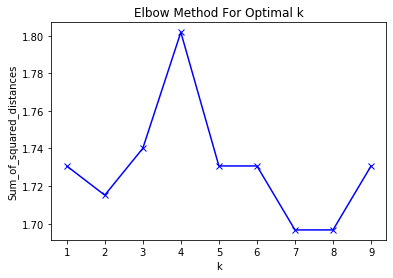

In [192]:
import matplotlib.pyplot as plt

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

#### Cluster Analysis 

In [193]:
# set number of clusters
kclusters = 7

toronto_grouped_clustering = toronto_grouped.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

#### Add cluster labels and input venue data into a Dataframe

In [210]:
#neighbourhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = df_hoodsT

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighbourhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')

toronto_merged.head()

,Postal Code,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M5A,Downtown Toronto,Harbourfront,43.654260,-79.360636,1,Coffee Shop,Park,Bakery,Pub,Theater,Restaurant,Café,Mexican Restaurant,Event Space,Chocolate Shop
1,M7A,Downtown Toronto,Queen's Park,43.662301,-79.389494,1,Coffee Shop,Park,Beer Bar,Seafood Restaurant,Sandwich Place,Burger Joint,Burrito Place,Restaurant,Café,Chinese Restaurant
2,M5B,Downtown Toronto,"Ryerson, Garden District",43.657162,-79.378937,1,Coffee Shop,Clothing Store,Café,Cosmetics Shop,Japanese Restaurant,Middle Eastern Restaurant,Ramen Restaurant,Bookstore,Diner,Electronics Store
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,1,Coffee Shop,Café,Restaurant,Italian Restaurant,Hotel,Breakfast Spot,Diner,Beer Bar,Cosmetics Shop,Bakery
4,M4E,East Toronto,The Beaches,43.676357,-79.293031,0,Trail,Pub,Neighborhood,Health Food Store,Yoga Studio,Dessert Shop,Diner,Discount Store,Distribution Center,Dog Run


#### Create visualization of clusters

In [200]:
toronto_merged=toronto_merged.dropna()

In [201]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighbourhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters






### 5. Examine Top 5 Neighbourhood Clusters

#### Cluster 1

In [202]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[2] + list(range(5, toronto_merged.shape[1]))]]

,Neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,The Beaches,0,Trail,Pub,Neighborhood,Health Food Store,Yoga Studio,Dessert Shop,Diner,Discount Store,Distribution Center,Dog Run


#### Cluster 2

In [203]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[2] + list(range(5, toronto_merged.shape[1]))]]


,Neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Harbourfront,1,Coffee Shop,Park,Bakery,Pub,Theater,Restaurant,Café,Mexican Restaurant,Event Space,Chocolate Shop
1,Queen's Park,1,Coffee Shop,Park,Beer Bar,Seafood Restaurant,Sandwich Place,Burger Joint,Burrito Place,Restaurant,Café,Chinese Restaurant
2,"Ryerson, Garden District",1,Coffee Shop,Clothing Store,Café,Cosmetics Shop,Japanese Restaurant,Middle Eastern Restaurant,Ramen Restaurant,Bookstore,Diner,Electronics Store
3,St. James Town,1,Coffee Shop,Café,Restaurant,Italian Restaurant,Hotel,Breakfast Spot,Diner,Beer Bar,Cosmetics Shop,Bakery
5,Berczy Park,1,Coffee Shop,Seafood Restaurant,Cheese Shop,Farmers Market,Bakery,Restaurant,Café,Beer Bar,Cocktail Bar,Liquor Store
6,Central Bay Street,1,Coffee Shop,Italian Restaurant,Burger Joint,Sandwich Place,Japanese Restaurant,Ice Cream Shop,Chinese Restaurant,Salad Place,Middle Eastern Restaurant,Juice Bar
7,Christie,1,Grocery Store,Café,Park,Candy Store,Gas Station,Baby Store,Italian Restaurant,Coffee Shop,Nightclub,Restaurant
8,"Adelaide, King, Richmond",1,Coffee Shop,Restaurant,Café,Thai Restaurant,Steakhouse,Bar,Gym,Cosmetics Shop,Seafood Restaurant,Asian Restaurant
9,"Dovercourt Village, Dufferin",1,Bakery,Pharmacy,Pizza Place,Grocery Store,Gym / Fitness Center,Fast Food Restaurant,Middle Eastern Restaurant,Music Venue,Pool,Café
10,"Harbourfront East, Toronto Islands...",1,Coffee Shop,Aquarium,Italian Restaurant,Café,Hotel,Sporting Goods Shop,Fried Chicken Joint,Restaurant,Scenic Lookout,Brewery


#### Cluster 3

In [204]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[2] + list(range(5, toronto_merged.shape[1]))]]

,Neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
19,Roselawn,3,Garden,Yoga Studio,Department Store,Ethiopian Restaurant,Empanada Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Donut Shop,Doner Restaurant


#### Cluster 4

In [205]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 4, toronto_merged.columns[[2] + list(range(5, toronto_merged.shape[1]))]]

,Neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
29,"Moore Park, Summerhill East",4,Park,Gym,Tennis Court,Playground,Yoga Studio,Dog Run,Dessert Shop,Diner,Discount Store,Distribution Center


#### Cluster 5

In [206]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 5, toronto_merged.columns[[2] + list(range(5, toronto_merged.shape[1]))]]

,Neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
18,Lawrence Park,5,Park,Gym / Fitness Center,Swim School,Bus Line,Yoga Studio,Dessert Shop,Empanada Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant


#### Cluster 6

In [108]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 6, toronto_merged.columns[[2] + list(range(5, toronto_merged.shape[1]))]]

,Neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue


#### Cluster 7

In [207]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 7, toronto_merged.columns[[2] + list(range(5, toronto_merged.shape[1]))]]

,Neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue


###  Conclusions


A large percentage of neighbourhoods were segregated in Cluster 3 by the analysis.
Inspection of neighbourhoods not placed in Cluster 3 indicated that each had a comparatively lower number
of venues (less than 10).  Also, these neighbourhoods indicated top venues such as Parks or other recreational
venues, unlike the neighbourhoods in Cluster 3.  Inspection of neighbourhoods in Cluster 3 indicated neighbourhoods
with fairly homogenous venue sets.